# **Credit Card Fraud Detection**

### Importing of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report,recall_score, precision_score, f1_score

## **Data Processing**

### Reading of DataSet in Notebook

In [2]:
df= pd.read_csv(r"C:\Users\Garima\Desktop\Credit_Card_fraud\credit card approvals (clean data)\clean_dataset.csv")

#### Shape of DataSet

In [3]:
df.shape

(690, 16)

#### Head and Tail Functions

In [4]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [5]:
df.tail()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


#### Information of DataSet

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


#### Checking the count of NULL values

In [7]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

##### *Gender*

1    480
0    210
Name: Gender, dtype: int64

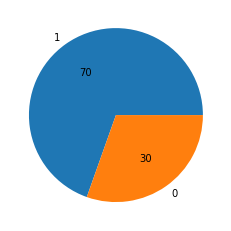

In [8]:
plt.pie(df['Gender'].value_counts(),autopct='%.f', labels=df['Gender'].value_counts().index);
df['Gender'].value_counts()

# Male Dominancy (1)

##### *Age*

In [9]:
df['Age'] = df['Age'].astype(int)

<AxesSubplot:xlabel='Age', ylabel='Count'>

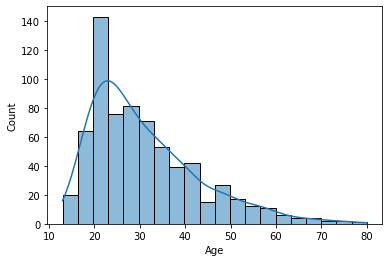

In [10]:
#Right Skewed Distribution
sns.histplot(df['Age'], kde=True)

C:\Users\Garima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

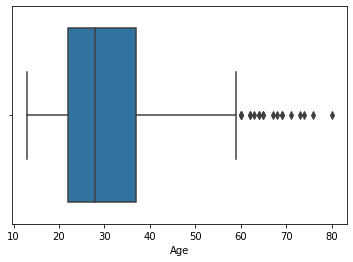

In [11]:
sns.boxplot(df['Age'])

##### *Debt*

C:\Users\Garima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Debt'>

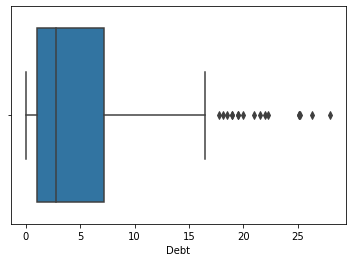

In [12]:
sns.boxplot(df['Debt'])

##### *Married*

1    525
0    165
Name: Married, dtype: int64

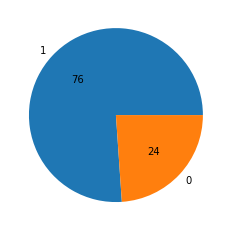

In [13]:
plt.pie(df['Married'].value_counts(),autopct='%.f', labels=df['Married'].value_counts().index)
df['Married'].value_counts()

# More than 50% are Married

##### *Bank Customer*

1    527
0    163
Name: BankCustomer, dtype: int64

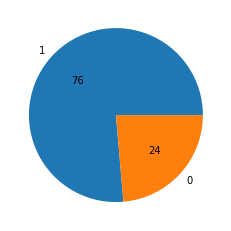

In [14]:
plt.pie(df['BankCustomer'].value_counts(),autopct='%.f', labels=df['BankCustomer'].value_counts().index)
df['BankCustomer'].value_counts()

# More than 50% are Bank Customers

##### *Industry*

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

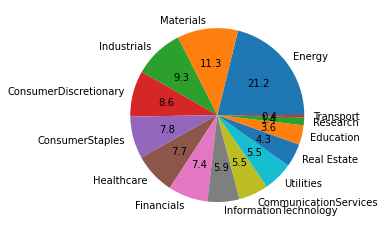

In [15]:
plt.pie(df['Industry'].value_counts(),autopct='%.1f', labels=df['Industry'].value_counts().index)
df['Industry'].value_counts()

#Vast Variety of Professions

In [16]:
df['Industry'].value_counts().sort_values()

Transport                  3
Research                  10
Education                 25
Real Estate               30
CommunicationServices     38
Utilities                 38
InformationTechnology     41
Financials                51
Healthcare                53
ConsumerStaples           54
ConsumerDiscretionary     59
Industrials               64
Materials                 78
Energy                   146
Name: Industry, dtype: int64

##### *Ethnicity*

White     408
Black     138
Asian      59
Latino     57
Other      28
Name: Ethnicity, dtype: int64

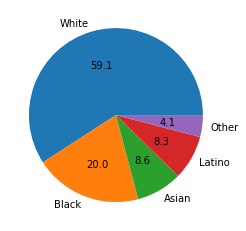

In [17]:
plt.pie(df['Ethnicity'].value_counts(),autopct='%.1f',labels=df['Ethnicity'].value_counts().index)
df['Ethnicity'].value_counts()

# White Dominancy

##### *Prior Default*

([<matplotlib.patches.Wedge at 0x2562aea7310>,
 [Text(-0.08006254192788104, 1.0970824897791627, '1'),
  Text(0.08006254192788115, -1.0970824897791627, '0')],
 [Text(-0.04367047741520783, 0.598408630788634, '52.3'),
  Text(0.043670477415207895, -0.598408630788634, '47.7')])

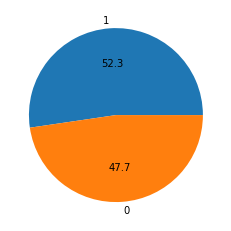

In [18]:
plt.pie(df['PriorDefault'].value_counts(),autopct='%.1f',labels=df['PriorDefault'].value_counts().index)

#More than 50% are Defaulted

##### *Employed*

([<matplotlib.patches.Wedge at 0x2562aeee550>,
 [Text(-0.24825935908973076, 1.071619004415448, '0'),
  Text(0.24825925875751764, -1.0716190276591622, '1')],
 [Text(-0.13541419586712586, 0.5845194569538807, '57.2'),
  Text(0.13541414114046416, -0.5845194696322702, '42.8')])

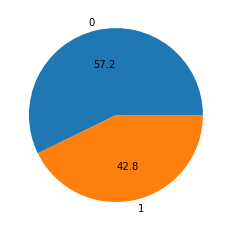

In [19]:
plt.pie(df['Employed'].value_counts(),autopct='%.1f',labels=df['Employed'].value_counts().index)

#More than 50% are Employed

##### *Credit Score*

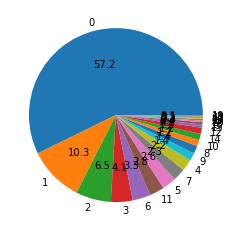

In [20]:
plt.pie(df['CreditScore'].value_counts(),autopct='%.1f',labels=df['CreditScore'].value_counts().index);

# More than 50% of Credit Score lies in 0.0. 

##### *Driver Liecence*

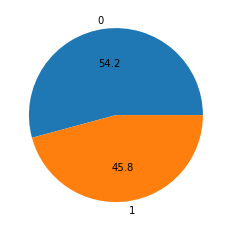

In [21]:
plt.pie(df['DriversLicense'].value_counts(),autopct='%.1f',labels=df['DriversLicense'].value_counts().index);

#More than 50% doesn't owns a Driving License

##### *Citizen*

ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64

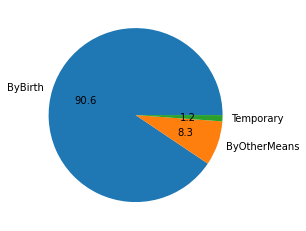

In [22]:
plt.pie(df['Citizen'].value_counts(),autopct='%.1f',labels=df['Citizen'].value_counts().index);
df['Citizen'].value_counts()

##### *Is Fraud?*

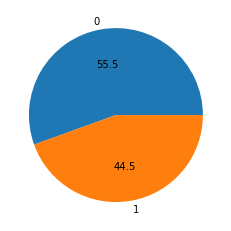

In [23]:
plt.pie(df['Approved'].value_counts(),autopct='%.1f',labels=df['Approved'].value_counts().index);

#More than 50% are Fraudesters

### Label Encoder

Applying label encoding in "Industry" column as it contains multiple labels in one column.

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [25]:
label= LabelEncoder()
df['Industry']=label.fit_transform(df['Industry'])
df['Industry'].value_counts()

4     146
9      78
7      64
1      59
2      54
6      53
5      51
8      41
0      38
13     38
10     30
3      25
11     10
12      3
Name: Industry, dtype: int64

In [26]:
industry= df['Industry'].values
industry

array([ 7,  9,  9,  7,  7,  0, 12,  8,  5,  7,  4,  4,  5,  5,  9,  5,  0,
        9, 10,  8,  4,  4,  4, 13,  9,  4,  1, 10,  3,  7,  2, 13,  1,  3,
        9,  7,  8, 13,  8,  6,  4,  4,  7,  7,  4,  4,  9,  8,  1,  4,  4,
        9,  7,  7,  8,  7,  8,  1, 13,  9,  0, 10,  9,  9,  8,  8,  4,  0,
        7, 13,  3, 10,  8,  0,  4,  9,  2,  2,  5,  4,  6,  0,  0, 10,  2,
        4, 10,  2,  2, 11,  4,  4,  2,  4,  4,  1,  2,  4,  9,  9,  4,  4,
        9,  5,  1,  3,  5,  2, 13,  4,  7,  6,  7,  5,  4,  9,  9,  5,  0,
        8,  9,  8,  2,  9,  9, 13,  0,  9,  1,  7,  3,  4,  3,  4,  9,  9,
        2,  0,  7,  9,  8, 11,  8,  7,  8,  8,  9,  9,  4,  4,  8,  9,  0,
        4,  8, 11, 13,  3,  5,  0, 13,  0, 13,  3,  9,  9,  9,  8,  9, 10,
        2,  4,  5,  5,  9,  7,  2,  2,  9,  2,  4,  1,  9,  4,  9,  4,  2,
        4,  4,  9,  4,  1, 13,  7,  1,  4, 13,  7,  2, 13,  9,  1,  4,  9,
        7,  9,  4,  9,  5,  4,  8, 10,  6,  1,  8,  2,  8,  6,  3,  4,  2,
        3,  2,  2,  9,  4

### OneHot Encoder

After applying Label Encoding in Industry column, it needs to be convert into numerical data as ML algorithms cannot work with categorical columna

In [27]:
industry_onehot=OneHotEncoder()
industry=industry_onehot.fit_transform(industry.reshape(-1,1))

In [28]:
industry= industry.toarray()

In [29]:
industry

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
df.Industry.unique()

array([ 7,  9,  0, 12,  8,  5,  4, 10, 13,  1,  3,  2,  6, 11])

###  Dropping of Columns

In [31]:
df.drop(columns=['Industry', 'Ethnicity', 'Citizen', 'ZipCode'], inplace=True)

In [32]:
#Shape of Dataset after dropping columns above mentioned.
df.shape

(690, 12)

In [33]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,1,30,0.000,1,1,1.25,1,1,1,0,0,1
1,0,58,4.460,1,1,3.04,1,1,6,0,560,1
2,0,24,0.500,1,1,1.50,1,0,0,0,824,1
3,1,27,1.540,1,1,3.75,1,1,5,1,3,1
4,1,20,5.625,1,1,1.71,1,0,0,0,0,1


In [34]:
#Fitting of columns in X and y
X= df.iloc[:,:-1].values
y= df.iloc[:, -1].values

In [35]:
#Shape of X after fitting the columns
X.shape

(690, 11)

In [36]:
#Shape of X after fitting the columns
y.shape

(690,)

In [37]:
#Merging Label Encoder Industry Column in X by numpy.c
X= np.c_[X, industry]

In [38]:
X[0]

array([ 1.  , 30.  ,  0.  ,  1.  ,  1.  ,  1.25,  1.  ,  1.  ,  1.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

### MinMax Scaler

In [39]:
minmax= MinMaxScaler()
X= minmax.fit_transform(X)

In [40]:
X[0]

array([1.        , 0.25373134, 0.        , 1.        , 1.        ,
       0.04385965, 1.        , 1.        , 0.01492537, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0) #train=75%

In [42]:
#Shape of X_train after spliting
X_train.shape

(483, 25)

In [43]:
#Shape of X_test after spliting
X_test.shape

(207, 25)

## **Modelling**

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Fitting

In [45]:
model.fit

<bound method LogisticRegression.fit of LogisticRegression()>

#### Predictions

In [46]:
y_pred= model.predict(X_test)

In [47]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

#### Accuracy_Score

In [49]:
accuracy_score(y_test, y_pred)

0.8502415458937198

#### Confusion Matrix

In [50]:
confusion_matrix(y_test, y_pred)

array([[99, 18],
       [13, 77]], dtype=int64)

In [51]:
y_pred.shape

(207,)

In [52]:
#correct predictions
99+77

176

In [53]:
#wrong prediction
13+18

31

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

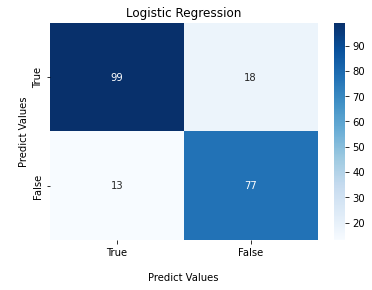

In [54]:
cf_random = confusion_matrix(y_test,y_pred)
cf_random = sns.heatmap(cf_random, annot=True, cmap='Blues')

cf_random.set_title('Logistic Regression')
cf_random.set_xlabel('\nPredict Values')
cf_random.set_ylabel('\nPredict Values')

cf_random.xaxis.set_ticklabels(['True','False'])
cf_random.yaxis.set_ticklabels(['True','False'])

In [55]:
recall_score(y_test,y_pred)

0.8555555555555555

In [56]:
f1_score(y_test, y_pred)

0.8324324324324324

In [57]:
precision_score(y_test, y_pred)

0.8105263157894737

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.81      0.86      0.83        90

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



#### Saving the data

In [59]:
import pickle as pkl

In [60]:
file = open('model.pkl','wb')
pkl.dump(model,file)
file.close()

In [61]:
file = open('label.pkl','wb')
pkl.dump(label,file)
file.close()

file = open('industry_onehot.pkl','wb')
pkl.dump(industry_onehot,file)
file.close()

In [62]:
file = open('minmax.pkl','wb')
pkl.dump(minmax,file)
file.close()